In [23]:
%reload_ext autoreload
%autoreload 2

%run ../init_imports.py

from photutils.isophote import Ellipse
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture
from photutils.isophote import build_ellipse_model
plt.rcParams['font.family'] = 'monospace'

In [24]:
galaxy_name = "UGC09629"
imageFile = f"../../data/{galaxy_name}_i.fits"
data = pyimfit.FixImage(fits.getdata(imageFile))

gain, sky, zcal, ron = 6.565, 221.61079, -23.59790, 5.76

x0, y0, sma, eps, pa = 111, 146, 10, 0.65, (38+90) * np.pi / 180
geometry = EllipseGeometry(x0=x0, y0=y0, sma=sma, eps=eps,
                           pa=pa)
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image(sma0=0)

In [61]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import plot_utils as pu
import utils as ut

res, rat = 400, 2
dpi=300
fig_w=rat*res / dpi
fig_h=res / dpi
fig, axs, fs = pu.figure_skeleton(fig_w=fig_w, fig_h=fig_h, 
                                  top_bool=True)

R, d, fact = 0.396, 115.3e6, 206265
xs = isolist.sma * R

profile_mag = ut.ADU_to_mag(isolist.intens, sky=sky, gain=gain, zcal=zcal)
profile_err_mag = 2.5 * np.abs(isolist.int_err / (isolist.intens * np.log(10)))
dic = {
    '$\mu_r$ (mag/arcsec)': [profile_mag, profile_err_mag],
    '$\epsilon$': [isolist.eps, isolist.ellip_err],
    'PA (º)': [isolist.pa, isolist.pa_err],
}

for i in range(3):
    current_xticks = axs[i][1].get_xticks()
    new_xtick_labels = np.around(current_xticks * d / fact * 1e-3, decimals=1)

pu.plot_val([axs[0][1], axs[0][2]], xs, dic, '$\mu_r$ (mag/arcsec)', fs, 
            ylabel2='$\Delta \mu_r$', quot=False)
axs[0][1].invert_yaxis()
pu.plot_val([axs[1][1], axs[1][2]], xs, dic, '$\epsilon$', fs,
            ylabel2='$\Delta \epsilon / \epsilon$')
pu.plot_val([axs[2][1], axs[2][2]], xs, dic, 'PA (º)', fs,
            ylabel2='$\Delta \\text{PA} / \\text{PA}$')


shrink, pad = 0.9, -0.03
vms = [8, 11.75]
data_mag = ut.ADU_to_mag(data, sky=sky, gain=gain, zcal=zcal)
pu.magplot(data_mag, axs[0][0], fs, vms=vms, shrink=shrink, pad=pad)

savefold = '../../figures/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
filename = 'fitplot.png'
savepath = os.path.join(savefold, filename)

# save figure
fig.savefig(savepath, dpi=300, bbox_inches='tight')

plt.close()

/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:330: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(new_xtick_labels)
/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:313: RuntimeWarning: invalid value encountered in divide
  err = vals_err/vals
/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:330: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(new_xtick_labels)
/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:313: RuntimeWarning: invalid value encountered in divide
  err = vals_err/vals
/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:330: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(new_xtick_labels)


/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:313: RuntimeWarning: invalid value encountered in divide
  axs[1][0].scatter(xs*R, vals_err/vals, s=s*fs, color='k', marker='s')
/home/prossello/extragalactic_lab1/code/plots/../plot_utils.py:327: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0][0].set_xticklabels(new_xtick_labels)


[ 0. 10. 20. 30. 40. 50. 60.]


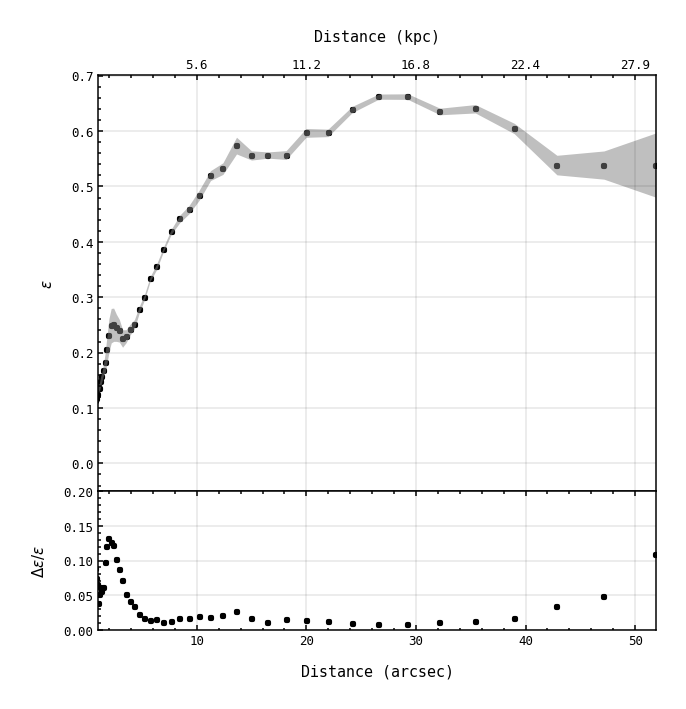

In [36]:


xs = isolist.sma
fig = pu.plot_lines(xs, isolist.eps, isolist.ellip_err, ylim2=[0, 0.2], 
ylabel1='$\epsilon$', ylabel2='$\Delta \epsilon / \epsilon$')

savefold = '../../figures/radial_profiles/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
filename = 'ellipticity.png'
savepath = os.path.join(savefold, filename)

# save figure
fig.savefig(savepath, dpi=300, bbox_inches='tight')


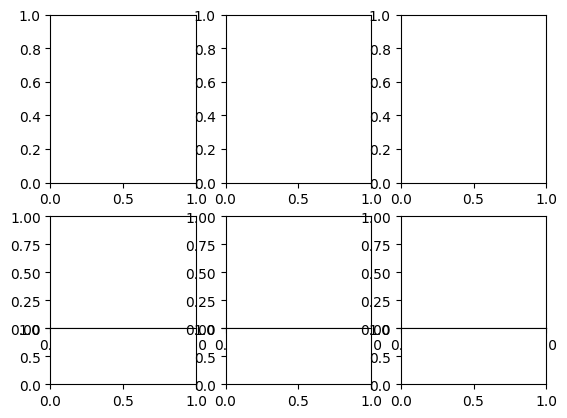

In [16]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

fig = plt.figure()

gs0 = gridspec.GridSpec(2, 3, figure=fig)


gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[1,0],
hspace=0, height_ratios=[2,1])
ax0 = fig.add_subplot(gs0[0, 0])
ax1 = fig.add_subplot(gs00[0, 0])
ax2 = fig.add_subplot(gs00[1, 0])

gs01 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[1,1],
hspace=0, height_ratios=[2,1])
ax3 = fig.add_subplot(gs0[0, 1])
ax4 = fig.add_subplot(gs01[0, 0])
ax5 = fig.add_subplot(gs01[1, 0])

gs02 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[1,2],
hspace=0, height_ratios=[2,1])
ax6 = fig.add_subplot(gs0[0, 2])
ax7 = fig.add_subplot(gs02[0, 0])
ax8 = fig.add_subplot(gs02[1, 0])

plt.show()

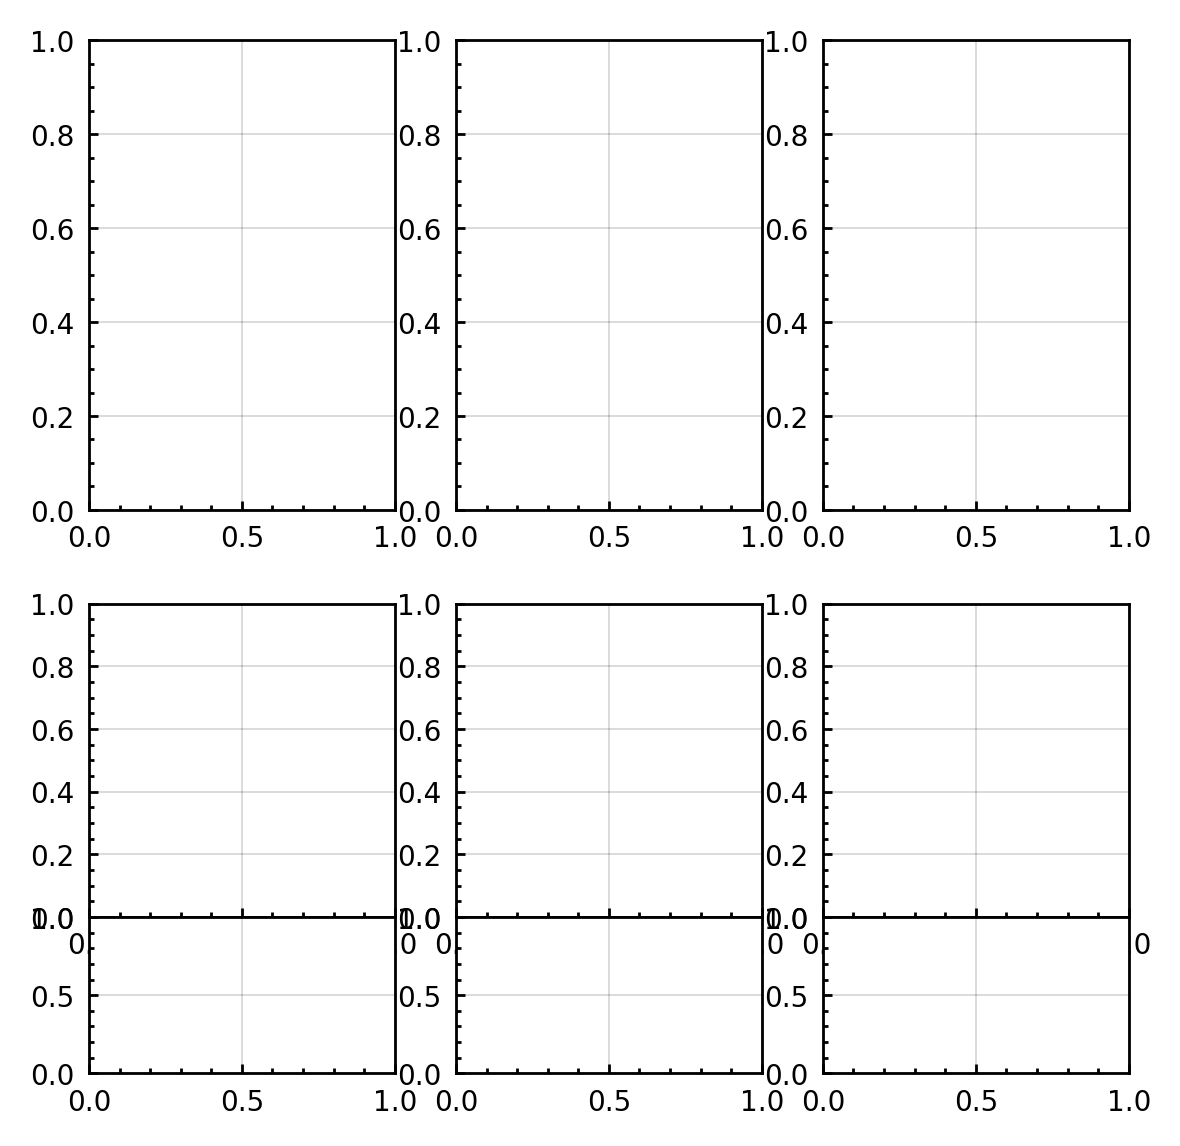

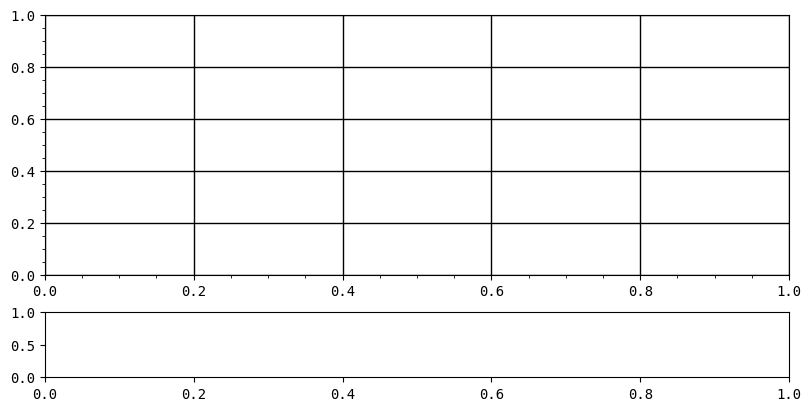

In [4]:
res, rat, subplots = 400, 2, (2,1)
dpi=100
fig_w=rat*res / dpi
fig_h=res / dpi
layout='constrained'
fig = plt.figure(
    figsize=(fig_w, fig_h),
    dpi=dpi,  # Default dpi, will adjust later for saving
    layout=layout,
)

wr_ = [1]
hr_ = [4, 1]
gs = mpl.gridspec.GridSpec(subplots[0], subplots[1], figure=fig, width_ratios=wr_, height_ratios=hr_, hspace=0)

axs = [[None] * subplots[1] for _ in range(subplots[0])]

for i in range(subplots[0]):
    for j in range(subplots[1]):
        axs[i][j] = fig.add_subplot(gs[i, j])

axs[0][0].grid(
    which="major",
    linewidth=1,
    color="black",
)

axs[0][0].minorticks_on()

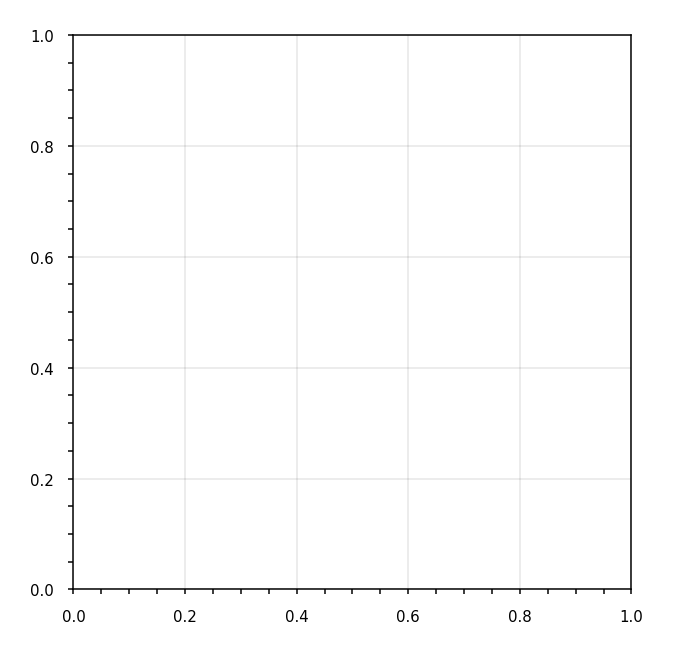

In [8]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import plot_utils as pu

res, rat, subplots = 720, 1, (1,1)
fig, axs, fs, gs = pu.initialize_figure(ratio=None, fig_w=rat*res, fig_h=res, 
                                        subplots=subplots, theme=None, layout=None)

ax = axs[0][0]

ax.minorticks_on()